In [32]:
import matplotlib.pyplot as plt
import numpy as np
import csv

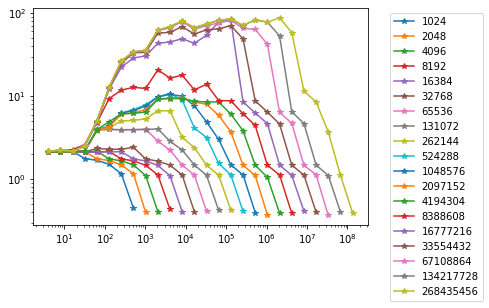

In [162]:
with open('pointer_chasing_results_clang_O1_native.txt') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)
    header = np.array(next(reader))
    max_row_length = len(header) - 1
    
    for index, row in enumerate(reader):
        # Add missing values as NaN
        # https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/masked_demo.html
        row = np.append(row, np.zeros(max_row_length - len(row) + 1) + np.nan)

        # Convert rows to the correct data type
        x = header[1:].astype(float)
        y = row[1:].astype(float)
        plt.loglog(x, y, marker='*', label=row[0])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [202]:
# Test: pandas instead of csv.reader
import pandas as pd
df = pd.read_csv("pointer_chasing_results_clang_O1_native.txt", skipinitialspace=True)
df

,N,4,8,16,32,64,128,256,512,1024,...,524288,1048576,2097152,4194304,8388608,16777216,33554432,67108864,134217728,268435456
0,1024,2.13155,2.18603,2.16581,1.77606,1.68685,1.51921,1.16538,0.448763,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2048,2.13453,2.12936,2.14851,2.16402,1.76403,1.68057,1.49296,1.163110,0.400964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4096,2.13247,2.14311,2.13491,2.12619,2.16560,1.76370,1.66551,1.493520,1.107490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8192,2.13109,2.13379,2.13016,2.11563,2.13488,2.16366,1.76165,1.665390,1.473320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16384,2.16244,2.11906,2.12017,2.11471,2.12591,2.13706,2.14589,1.755190,1.665460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,32768,2.12956,2.13152,2.11982,2.13644,2.34862,2.29491,2.29721,2.425880,1.758000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,65536,2.13469,2.12025,2.12354,2.18218,3.92431,3.98805,3.94903,3.966310,4.006710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,131072,2.12255,2.12586,2.14008,2.18018,3.91777,3.98301,3.93606,3.956130,3.960310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,262144,2.12642,2.14465,2.14219,2.20499,3.83459,4.16905,5.01060,5.123910,5.315770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,524288,2.12456,2.12722,2.14463,2.17837,3.98987,4.32290,6.28944,6.865850,7.878760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-200-f30f98cb048e>:8: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


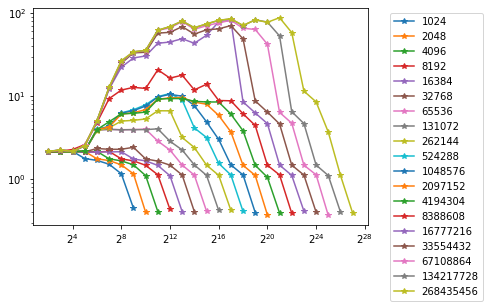

In [200]:
header = df.columns.values

for index, row in enumerate(df.values):
    x = header[1:].astype(float)
    y = row[1:]
    plt.loglog(x, y, marker='*', label=row[0].astype(int))

plt.xscale('log', basex=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()